In [1]:
from elasticsearch import Elasticsearch

es = Elasticsearch("http://localhost:9200")
print(es.info())

{'name': '35db0217e7c2', 'cluster_name': 'docker-cluster', 'cluster_uuid': 'B8bzwDMNRAGS4CcKDzlnLA', 'version': {'number': '8.14.3', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': 'd55f984299e0e88dee72ebd8255f7ff130859ad0', 'build_date': '2024-07-07T22:04:49.882652950Z', 'build_snapshot': False, 'lucene_version': '9.10.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'}


In [2]:
print(es.cat.indices())

green  open .internal.alerts-transform.health.alerts-default-000001            ozkMf9pdRg-GFcZVK22jGQ 1 0    0 0    249b    249b    249b
green  open .internal.alerts-observability.logs.alerts-default-000001          TAafA1G0RYay6o8mYDS86g 1 0    0 0    249b    249b    249b
yellow open market-ticks                                                       QlLhxrubQoug0RyGiA8fgA 1 1    2 0  10.7kb  10.7kb  10.7kb
green  open .internal.alerts-observability.uptime.alerts-default-000001        sub_KzhaTwqAGdQbsIR1Fw 1 0    0 0    249b    249b    249b
green  open .internal.alerts-ml.anomaly-detection.alerts-default-000001        RyIvfasOS3OlrQK2Fzh4XA 1 0    0 0    249b    249b    249b
green  open .internal.alerts-observability.slo.alerts-default-000001           pAPvdnYGSi6lrvpZa3MujQ 1 0    0 0    249b    249b    249b
green  open .internal.alerts-default.alerts-default-000001                     2XkPWHL0RlOAYDrnzShuww 1 0    0 0    249b    249b    249b
green  open .internal.alerts-observabilit

In [3]:
print(es.cat.indices(format="json"))

[{'health': 'green', 'status': 'open', 'index': '.internal.alerts-transform.health.alerts-default-000001', 'uuid': 'ozkMf9pdRg-GFcZVK22jGQ', 'pri': '1', 'rep': '0', 'docs.count': '0', 'docs.deleted': '0', 'store.size': '249b', 'pri.store.size': '249b', 'dataset.size': '249b'}, {'health': 'green', 'status': 'open', 'index': '.internal.alerts-observability.logs.alerts-default-000001', 'uuid': 'TAafA1G0RYay6o8mYDS86g', 'pri': '1', 'rep': '0', 'docs.count': '0', 'docs.deleted': '0', 'store.size': '249b', 'pri.store.size': '249b', 'dataset.size': '249b'}, {'health': 'yellow', 'status': 'open', 'index': 'market-ticks', 'uuid': 'QlLhxrubQoug0RyGiA8fgA', 'pri': '1', 'rep': '1', 'docs.count': '2', 'docs.deleted': '0', 'store.size': '10.7kb', 'pri.store.size': '10.7kb', 'dataset.size': '10.7kb'}, {'health': 'green', 'status': 'open', 'index': '.internal.alerts-observability.uptime.alerts-default-000001', 'uuid': 'sub_KzhaTwqAGdQbsIR1Fw', 'pri': '1', 'rep': '0', 'docs.count': '0', 'docs.deleted':

In [4]:
mapping = es.indices.get_mapping(index="market-ticks")
print(mapping)

{'market-ticks': {'mappings': {'properties': {'@timestamp': {'type': 'date'}, 'ask': {'type': 'double'}, 'bid': {'type': 'double'}, 'last': {'type': 'double'}, 'symbol': {'type': 'keyword'}, 'timestamp': {'type': 'date'}, 'vol': {'type': 'integer'}}}}}


In [5]:
stats = es.indices.stats(index="market-ticks")
print(stats)

{'_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_all': {'primaries': {'docs': {'count': 2, 'deleted': 0, 'total_size_in_bytes': 10588}, 'shard_stats': {'total_count': 1}, 'store': {'size_in_bytes': 11002, 'total_data_set_size_in_bytes': 11002, 'reserved_in_bytes': 0}, 'indexing': {'index_total': 2, 'index_time_in_millis': 17, 'index_current': 0, 'index_failed': 0, 'delete_total': 0, 'delete_time_in_millis': 0, 'delete_current': 0, 'noop_update_total': 0, 'is_throttled': False, 'throttle_time_in_millis': 0, 'write_load': 9.582775797349735e-07}, 'get': {'total': 0, 'time_in_millis': 0, 'exists_total': 0, 'exists_time_in_millis': 0, 'missing_total': 0, 'missing_time_in_millis': 0, 'current': 0}, 'search': {'open_contexts': 0, 'query_total': 9, 'query_time_in_millis': 89, 'query_current': 0, 'fetch_total': 9, 'fetch_time_in_millis': 28, 'fetch_current': 0, 'scroll_total': 0, 'scroll_time_in_millis': 0, 'scroll_current': 0, 'suggest_total': 0, 'suggest_time_in_millis': 0, 'suggest_

In [6]:
from datetime import datetime

doc = {
    "timestamp": datetime.utcnow(),
    "symbol": "AAPL",
    "bid": 175.25,
    "ask": 175.30,
    "last": 175.28,
    "vol": 1000
}

es.index(index="market-ticks", document=doc)
es.indices.refresh(index="market-ticks")

/var/folders/08/0t4f35796gzbwn37cdvpbs_m0000gn/T/ipykernel_97111/734656182.py:4: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow(),


ObjectApiResponse({'_shards': {'total': 2, 'successful': 1, 'failed': 0}})

In [7]:
resp = es.search(index="market-ticks", size=5, query={"match_all": {}})
print(resp["hits"]["hits"])

[{'_index': 'market-ticks', '_id': 'iOpBl5kBQBuK0ylsjBAR', '_score': 1.0, '_source': {'timestamp': '2025-09-29T20:54:39.370417', 'symbol': 'AAPL', 'bid': 175.25, 'ask': 175.3, 'last': 175.28, 'vol': 1000}}, {'_index': 'market-ticks', '_id': 'iuopmJkBQBuK0yls2hAm', '_score': 1.0, '_source': {'timestamp': '2025-09-30T01:08:23.715548', 'symbol': 'AAPL', 'bid': 175.25, 'ask': 175.3, 'last': 175.28, 'vol': 1000}}, {'_index': 'market-ticks', '_id': 'i-qTmpkBQBuK0ylsvxA1', '_score': 1.0, '_source': {'timestamp': '2025-09-30T12:23:18.065148', 'symbol': 'AAPL', 'bid': 175.25, 'ask': 175.3, 'last': 175.28, 'vol': 1000}}]


In [8]:
from datetime import datetime, timedelta, timezone
from elasticsearch import Elasticsearch

es = Elasticsearch("http://localhost:9200")

now = datetime.now(timezone.utc).isoformat()
one_hour_ago = (datetime.now(timezone.utc) - timedelta(hours=1)).isoformat()

q = {
  "bool": {
    "filter": [
      {"term": {"symbol": "AAPL"}},                 # symbol is 'keyword' → term is correct
      {"range": {"timestamp": {"gte": one_hour_ago, "lte": now}}},
      {"range": {"vol": {"gt": 0}}}
    ]
  }
}

resp = es.search(index="market-ticks", size=50, query=q, sort=[{"timestamp": "desc"}])
for h in resp["hits"]["hits"]:
    print(h["_source"])

{'timestamp': '2025-09-30T12:23:18.065148', 'symbol': 'AAPL', 'bid': 175.25, 'ask': 175.3, 'last': 175.28, 'vol': 1000}


In [9]:
agg = {
  "size": 0,                     # we don't need individual docs
  "query": q,                    # reuse the same filter you built
  "aggs": {
    "avg_bid":  {"avg": {"field": "bid"}},
    "avg_ask":  {"avg": {"field": "ask"}},
    "avg_last": {"avg": {"field": "last"}}
  }
}

resp = es.search(index="market-ticks", body=agg)
print(resp["aggregations"])

{'avg_bid': {'value': 175.25}, 'avg_ask': {'value': 175.3}, 'avg_last': {'value': 175.28}}


In [10]:
bars = {
  "size": 0,
  "query": q,        # reuse your filter
  "aggs": {
    "by_minute": {
      "date_histogram": {
        "field": "timestamp",
        "calendar_interval": "minute"
      },
      "aggs": {
        "min_last": {"min": {"field": "last"}},
        "max_last": {"max": {"field": "last"}},
        "avg_last": {"avg": {"field": "last"}},
        "sum_vol":  {"sum": {"field": "vol"}}
      }
    }
  }
}

resp = es.search(index="market-ticks", body=bars)

for b in resp["aggregations"]["by_minute"]["buckets"]:
    print(b["key_as_string"],
          b["min_last"]["value"],
          b["max_last"]["value"],
          b["avg_last"]["value"],
          b["sum_vol"]["value"])

2025-09-30T12:23:00.000Z 175.28 175.28 175.28 1000.0


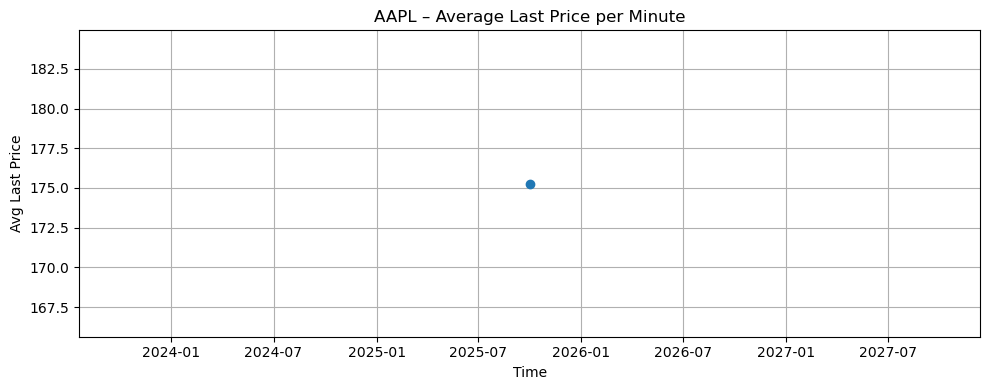

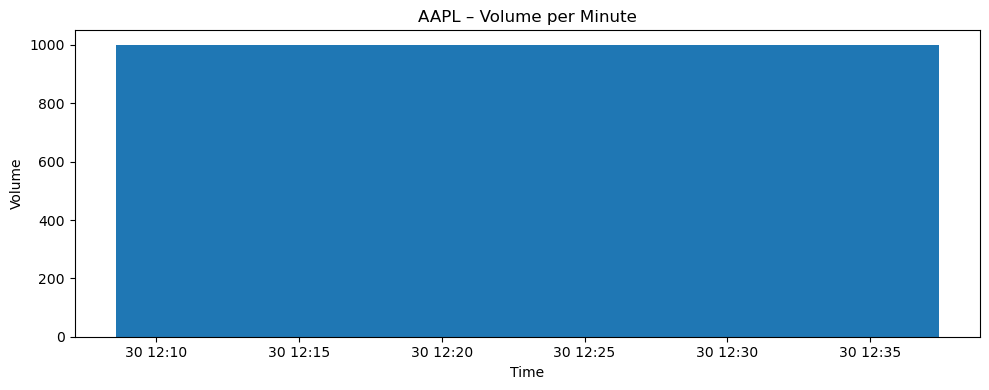

In [11]:
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timezone

# Extract data from aggregation result
times, avg_last, volumes = [], [], []

for b in resp["aggregations"]["by_minute"]["buckets"]:
    # convert ES timestamp (ms) to Python datetime
    ts = datetime.fromtimestamp(b["key"] / 1000.0, tz=timezone.utc)
    times.append(ts)
    avg_last.append(b["avg_last"]["value"])
    volumes.append(b["sum_vol"]["value"])

# --- Plot average price over time ---
plt.figure(figsize=(10,4))
plt.plot(times, avg_last, marker="o")
plt.title("AAPL – Average Last Price per Minute")
plt.xlabel("Time")
plt.ylabel("Avg Last Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot volume over time ---
plt.figure(figsize=(10,4))
plt.bar(times, volumes, width=0.02)   # thin bars
plt.title("AAPL – Volume per Minute")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()